#### [학습에 필요한 모듈 선언]

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

#### [환경설정]

In [2]:
# 학습률
learningRate = 0.001

# 총 학습 횟수
totalEpochs = 20
# 학습데이터를 나누기 위한 값
# 학습데이터 총수 / batch_size = 한번의 epoch 쓰이는 데이터 수
batch_size = 200

# W, b 변수 생성 타입 (1 : random_normal, 2: truncated_normal, 3:  random_uniform)
randomVariableType = 1

# input Layer 크기
# 입력 데이터 크기 784 (손글씨 이미지는 28 * 28 픽셀로 총 784개)
inputDataSize = 28 * 28 # 입력 데이터 고정값(수정불가)

# hidden Layer 크기
hiddenLayer1Size = 1024
hiddenLayer2Size = 512
hiddenLayer3Size = 256

# output Layer 크기
# 출력값 크기 (Output Layer에서 출력되 데이터(0~9까지 숫자)
outputLayerSize = 128
outputDataSize = 10 # 출력값 크기 고정(수정불가)

#### [빌드단계] Step 1) 학습 데이터 준비

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./dataset\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./dataset\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

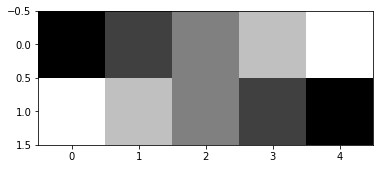

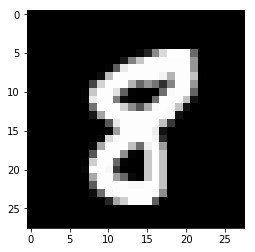

In [3]:
# 공식 tensorflow github에서 제공하는 mnist dataset 다운로드
# 결과 데이터는 ont hot encoding을 적용
mnist = input_data.read_data_sets("./dataset", one_hot = True)

print("Train data num        : {}".format(mnist.train.num_examples))
print("Train data shape      : {}".format(mnist.train.images.shape))
print("Test data num         : {}".format(mnist.test.num_examples ))
print("Train data shape      : {}".format(mnist.test.images.shape))
print("Validation data num   : {}".format(mnist.validation.num_examples))
print("Validation data shape : {}".format(mnist.validation.images.shape))

# 손글씨 이미지 픽셀로 표현 방법
image = [[1,2,3,4,5],
         [5,4,3,2,1]]
plt.imshow(image, cmap='gray')
plt.show()
# 손글씨 이미지 그래프로 출력
batch = mnist.train.next_batch(1)
plotData = batch[0]
plotData = plotData.reshape(28, 28)
plt.imshow(plotData, cmap='gray')
plt.show()

#### [빌드단계] Step 2) 모델 생성을 위한 변수 초기화

In [4]:
# 학습데이터가 들어갈 플레이스 홀더 선언
X = tf.placeholder(tf.float32, [None, inputDataSize])
# 학습데이터가 들어갈 플레이스 홀더 선언
Y = tf.placeholder(tf.float32, [None, outputDataSize])

# 임의의 난수를 선언하여 W,b 변수의 초기값을 선언 및 Neural Network Layer 구성
if randomVariableType == 1:
    # 1 : random_normal
    # Input Layer
    W_input = tf.Variable(tf.random_normal([inputDataSize, hiddenLayer1Size]),
                          name = 'Weight_input')
    b_input = tf.Variable(tf.random_normal([hiddenLayer1Size]), name = 'bias_input')

    # Hidden Layer
    # Layer1
    W_hidden1 = tf.Variable(tf.random_normal([hiddenLayer1Size, hiddenLayer2Size]),
                            name = 'Weight_hidden1')
    b_hidden1 = tf.Variable(tf.random_normal([hiddenLayer2Size]),
                            name = 'bias_hidden1')

    # Layer2
    W_hidden2 = tf.Variable(tf.random_normal([hiddenLayer2Size, hiddenLayer3Size]),
                            name = 'Weight_hidden2')
    b_hidden2 = tf.Variable(tf.random_normal([hiddenLayer3Size]),
                            name = 'bias_hidden2')

    # Layer3
    W_hidden3 = tf.Variable(tf.random_normal([hiddenLayer3Size, outputLayerSize]),
                            name = 'Weight_hidden3')
    b_hidden3 = tf.Variable(tf.random_normal([outputLayerSize]),
                            name = 'bias_hidden3')

    # Output Layer
    W_output = tf.Variable(tf.random_normal([outputLayerSize,outputDataSize]),
                           name = 'Weight_output')
    b_output = tf.Variable(tf.random_normal([outputDataSize]),
                           name = 'bias_output')

elif randomVariableType == 2:
    # 2 : truncated_normal

    # Input Layer
    W_input = tf.Variable(tf.truncated_normal([inputDataSize, hiddenLayer1Size]),
                          name = 'Weight_input')
    b_input = tf.Variable(tf.truncated_normal([hiddenLayer1Size]),
                          name = 'bias_input')

    # Hidden Layer
    # Layer1
    W_hidden1 = tf.Variable(tf.truncated_normal([hiddenLayer1Size, hiddenLayer2Size]),
                            name = 'Weight_hidden1')
    b_hidden1 = tf.Variable(tf.truncated_normal([hiddenLayer2Size]), name = 'bias_hidden1')

    # Layer2
    W_hidden2 = tf.Variable(tf.truncated_normal([hiddenLayer2Size, hiddenLayer3Size]),
                            name = 'Weight_hidden2')
    b_hidden2 = tf.Variable(tf.truncated_normal([hiddenLayer3Size]),
                            name = 'bias_hidden2')

    # Layer3
    W_hidden3 = tf.Variable(tf.truncated_normal([hiddenLayer3Size, outputLayerSize]),
                            name = 'Weight_hidden3')
    b_hidden3 = tf.Variable(tf.truncated_normal([outputLayerSize]),
                            name = 'bias_hidden3')

    # Output Layer
    W_output = tf.Variable(tf.truncated_normal([outputLayerSize, outputDataSize]),
                           name = 'Weight_output')
    b_output = tf.Variable(tf.truncated_normal([outputDataSize]),
                           name = 'bias_output')

elif randomVariableType == 3:
    # 3 : random_uniform
    # Input Layer
    W_input = tf.Variable(tf.random_uniform([inputDataSize, hiddenLayer1Size]),
                          name = 'Weight_input')
    b_input = tf.Variable(tf.random_uniform([hiddenLayer1Size]),
                          name = 'bias_input')

    # Hidden Layer
    # Layer1
    W_hidden1 = tf.Variable(tf.random_uniform([hiddenLayer1Size, hiddenLayer2Size]),
                            name = 'Weight_hidden1')
    b_hidden1 = tf.Variable(tf.random_uniform([hiddenLayer2Size]),
                            name = 'bias_hidden1')

    # Layer2
    W_hidden2 = tf.Variable(tf.random_uniform([hiddenLayer2Size, hiddenLayer3Size]),
                            name = 'Weight_hidden2')
    b_hidden2 = tf.Variable(tf.random_uniform([hiddenLayer3Size]),
                            name = 'bias_hidden2')

    # Layer3
    W_hidden3 = tf.Variable(tf.random_uniform([hiddenLayer3Size, outputLayerSize]),
                            name = 'Weight_hidden3')
    b_hidden3 = tf.Variable(tf.random_uniform([outputLayerSize]),
                            name = 'bias_hidden3')

    # Output Layer
    W_output = tf.Variable(tf.random_uniform([outputLayerSize, outputDataSize]),
                           name = 'Weight_output')
    b_output = tf.Variable(tf.random_uniform([outputDataSize]),
                           name = 'bias_output')


#### [빌드단계] 3) 학습 모델 그래프 구성

In [6]:
# 3-1) 학습데이터를 대표 하는 가설 그래프 선언
# hypothesis - Input Layer
Layer_input_hypothesis = tf.nn.relu(tf.matmul(X, W_input)+b_input)
# hypothesis - Hidden Layer
Layer_hidden1_hypothesis = tf.nn.relu(tf.matmul(Layer_input_hypothesis,W_hidden1)+b_hidden1)
Layer_hidden2_hypothesis = tf.nn.relu(tf.matmul(Layer_hidden1_hypothesis,W_hidden2)+b_hidden2)
Layer_hidden3_hypothesis = tf.nn.relu(tf.matmul(Layer_hidden2_hypothesis,W_hidden3)+b_hidden3)
# hypothesis - Output Layer
Layer_output_hypothesis_logit = tf.matmul(Layer_hidden3_hypothesis, W_output)+b_output

# 3-2) 비용함수(오차함수,손실함수) 선언
costFunction = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Layer_output_hypothesis_logit, labels=Y))

# 3-3) 비용함수의 값이 최소가 되도록 하는 최적화함수 선언
optimizer = tf.train.AdamOptimizer(learning_rate = learningRate)
train = optimizer.minimize(costFunction)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### [실행단계] 학습 모델 그래프를 실행

--------------------------------------------------------------------------------
Train(Optimization) Start 
epoch : 0, cost = 32.36885298295454
epoch : 1, cost = 13.253767755681817
epoch : 2, cost = 12.277697975852274
epoch : 3, cost = 11.048693181818182
epoch : 4, cost = 7.468753551136364
epoch : 5, cost = 6.082149325284091
epoch : 6, cost = 5.329085582386363
epoch : 7, cost = 0.5959455455433239
epoch : 8, cost = 0.7787948885830966
epoch : 9, cost = 0.9057434636896307
epoch : 10, cost = 2.644583185369318
epoch : 11, cost = 0.6984488192471591
epoch : 12, cost = 0.42218231201171874
epoch : 13, cost = 0.9976690118963069
epoch : 14, cost = 0.23035002274946734
epoch : 15, cost = 0.33479137073863635
epoch : 16, cost = 0.20468675093217328
epoch : 17, cost = 0.0
epoch : 18, cost = 0.0
epoch : 19, cost = 0.19711037375710228


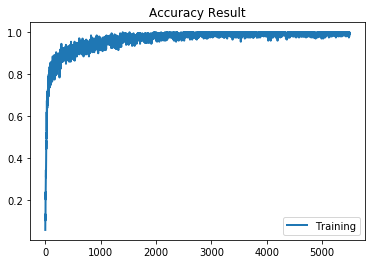

Train Finished
--------------------------------------------------------------------------------
[Test Result]

Hypothesis : [[-168438.12   -329708.12   -160480.7    ...   53416.402  -208962.23
   -61082.69  ]
 [-114815.78      3290.1047  152530.84   ... -331551.66   -238879.58
  -242223.62  ]
 [-224885.27     90220.734   -94751.08   ...  -50506.      -47210.9
   -81675.805 ]
 ...
 [-206835.7    -285990.03    -84779.06   ...  -73223.93     36580.24
    48996.26  ]
 [-218724.61    -97256.37   -225314.36   ... -172458.27     -5042.6504
  -195816.38  ]
 [ -23369.186  -365406.75   -140664.45   ... -447181.12   -208190.75
   -46859.066 ]] 
Prediction : [ True  True  True ...  True  True  True] 
Accuracy : 0.9476000070571899


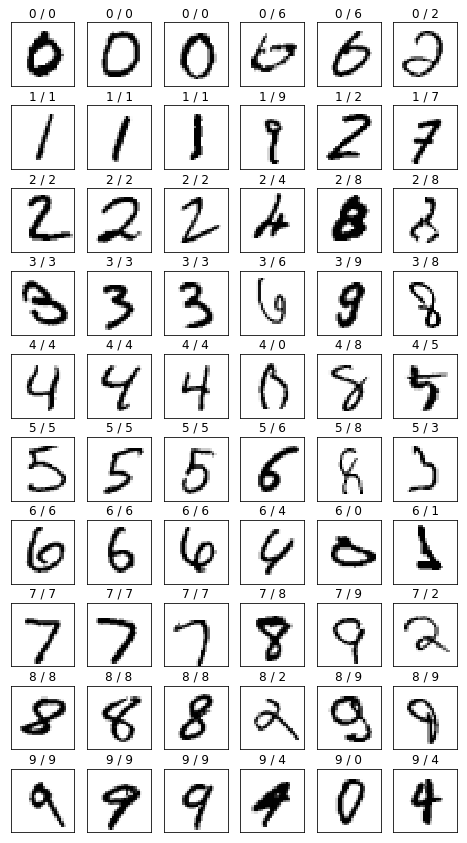

--------------------------------------------------------------------------------


In [7]:
# 실행을 위한 세션 선언
sess = tf.Session()
# 최적화 과정을 통하여 구해질 변수 W,b 초기화
sess.run(tf.global_variables_initializer())

# 예측값, 정확도 수식 선언
predicted = tf.equal(tf.argmax(Layer_output_hypothesis_logit, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

# 학습 정확도를 저장할 리스트 선언
train_accuracy = list()

print("--------------------------------------------------------------------------------")
print("Train(Optimization) Start ")

for epoch in range(totalEpochs):
    average_costFunction = 0
    # 전체 batch 사이즈 구하기 (55000 / 200 = 275)
    totalBatch = int(mnist.train.num_examples / batch_size)

    for step in range(totalBatch):
        batchX, batchY = mnist.train.next_batch(batch_size)
        cost_val, acc_val, _ = sess.run([costFunction, accuracy, train],
                                feed_dict = {X : batchX, Y:batchY})
        train_accuracy.append(acc_val)
        average_costFunction = cost_val / totalBatch

    print("epoch : {}, cost = {}".format(epoch,average_costFunction))


# 정확도 결과 확인 그래프
plt.plot(range(len(train_accuracy)), train_accuracy, linewidth = 2, label = 'Training')
plt.legend()
plt.title("Accuracy Result")
plt.show()

print("Train Finished")
print("--------------------------------------------------------------------------------")
print("[Test Result]")
# 최적화가 끝난 학습 모델 테스트
h_val, p_val, a_val = sess.run([Layer_output_hypothesis_logit, predicted, accuracy],
                        feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print("\nHypothesis : {} \nPrediction : {} \nAccuracy : {}".format(h_val,p_val,a_val))


# matplotlib 를 이용하여 학습 결과를 시각화
# 라벨 0 / 4 는 앞자리는 예측값 / 실제값 을 나타냄
fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, h) in zip(mnist.test.images, mnist.test.labels, h_val):
        prediction, actual = np.argmax(h), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break
plt.show()
print("--------------------------------------------------------------------------------")

#세션종료
sess.close()